# DOG BREED IDENTIFICATION

IMPORTING LIBRARIES for EDA

In [2]:
import pandas as pd

In [3]:
labels_filepath = "E:/DOG-BREED-IDENTIFICATION/labels.csv"
labels_dataframe = pd.read_csv(labels_filepath)
labels_dataframe.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [5]:
labels_dataframe.describe()

,id,breed
count,10222,10222
unique,10222,120
top,387603961b4002a45c703147e086760a,scottish_deerhound
freq,1,126


In [7]:
# Checking Class Balancing

print("Maximum samples for a breed: ", labels_dataframe.breed.value_counts().max())
print("Minimum samples for a breed: ", labels_dataframe.breed.value_counts().min())

Maximum samples for a breed:  126
Minimum samples for a breed:  66


<AxesSubplot:>

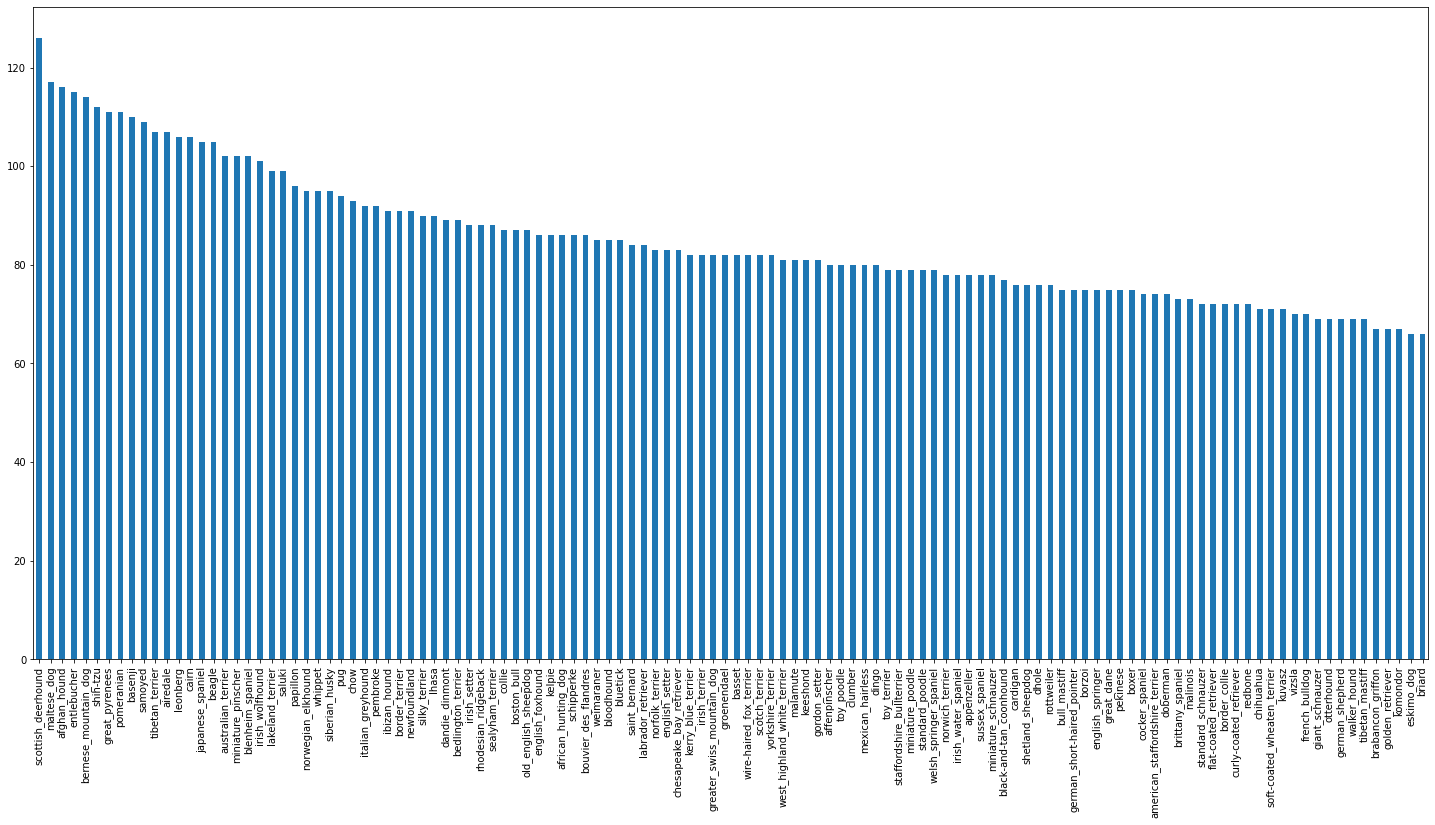

In [8]:
labels_dataframe.breed.value_counts().plot.bar(figsize=(25,12))

WE CLEARLY SEE IMBALANCE OF CLASSES OF BREEDS:
    
FIRST LETS BUILD THE CNN FROM SCRATCH WITH SOME ACTIVATION FUNCTION AND OPTIMIZERS AND CHECK ON THE RAW DATSET WITHOUT ANY AUGUMENTATION.

# CNN LAYERS BUILDING

LET US CREATE TYPICAL SEQENTIAL MODEL USING KERAS PAKAGE AND TARIN IT ON SOME BASIC PARAMETERS

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint  
import datetime
from keras.preprocessing.image import ImageDataGenerator
import os

In [14]:
train_dir='./train'
test_dir='./test'

In [15]:
print("No of dog's images in train directory",len(os.listdir(train_dir)))
print("No of dog's images in test directory",len(os.listdir(test_dir)))

No of dog's images in train directory 10222
No of dog's images in test directory 10357


In [16]:
dog_breeds=sorted(list(set(labels_dataframe['breed'])))
n_classes=len(dog_breeds)
print(n_classes)
print(dog_breeds)

120
['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', '

In [17]:
classes_to_num=dict(zip(dog_breeds,range(n_classes)))

In [18]:
(train_dir+'/'+labels_dataframe['id']+'.jpg')[0]

'./train/000bec180eb18c7604dcecc8fe0dba07.jpg'

In [19]:
classes_to_num

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

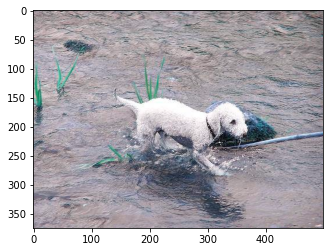

In [21]:
import cv2
from matplotlib import pyplot as plt
plt.imshow(cv2.imread((train_dir+'/'+labels_dataframe.id+'.jpg')[5]))

In [22]:
labels_dataframe['file_name']=labels_dataframe['id'].apply(lambda x: train_dir+'/'+f"{x}.jpg")
labels_dataframe

,id,breed,file_name
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,./train/ffd25009d635cfd16e793503ac5edef0.jpg
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,./train/ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,./train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,./train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg


In [23]:
labels_dataframe['breed']=labels_dataframe['breed'].map(classes_to_num)
labels_dataframe

,id,breed,file_name
0,000bec180eb18c7604dcecc8fe0dba07,19,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,37,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,85,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,15,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,49,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg
...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,18,./train/ffd25009d635cfd16e793503ac5edef0.jpg
10218,ffd3f636f7f379c51ba3648a9ff8254f,35,./train/ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219,ffe2ca6c940cddfee68fa3cc6c63213f,3,./train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220,ffe5f6d8e2bff356e9482a80a6e29aac,75,./train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg


In [24]:
from tensorflow.keras.utils import to_categorical,plot_model
y=to_categorical(labels_dataframe['breed'])
y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y.shape

(10222, 120)

In [26]:
import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input as resnet_preprocess
from keras.applications.inception_v3 import InceptionV3,preprocess_input as inception_preprocess
from keras.applications.xception import Xception , preprocess_input as xception_preprocess
from keras.applications.nasnet import NASNetLarge,preprocess_input as nasnet_preprocess
from keras.layers.merge import concatenate
from keras.layers import BatchNormalization,Dense,GlobalAveragePooling2D,Lambda,Dropout,InputLayer,Input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import BatchNormalization,Dense,GlobalAveragePooling2D,Lambda,Dropout,InputLayer,Input
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import load_img

In [27]:
input_shape=(331,331,3)
input_layer=Input(shape=(input_shape))


In [28]:
preprocess_resnet=Lambda(resnet_preprocess)(input_layer)
inception_resnet=InceptionResNetV2(weights='imagenet',include_top=False,
                                   input_shape=input_shape,pooling='avg')(preprocess_resnet)



preprocessor_inception=Lambda(inception_preprocess)(input_layer)
inception_v3=InceptionV3(weights='imagenet',include_top=False,
                                   input_shape=input_shape,pooling='avg')(preprocessor_inception)



preprocessor_xception=Lambda(xception_preprocess)(input_layer)
xception=Xception(weights='imagenet',include_top=False,
                                   input_shape=input_shape,pooling='avg')(preprocessor_xception)

preprocessor_nasnet=Lambda(nasnet_preprocess)(input_layer)
nasnet=NASNetLarge(weights='imagenet',include_top=False,
                                   input_shape=input_shape,pooling='avg')(preprocessor_nasnet)



In [29]:
merge=concatenate([inception_resnet,inception_v3,xception,nasnet])
model=Model(inputs=input_layer,outputs=merge)

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 331, 331, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 331, 331, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 331, 331, 3)  0           input_1[0][0]                    
______________________________________________________________________________________________

In [32]:
def feature_extractor(df):
    img_size = (331,331,3)
    data_size = len(df)
    batch_size = 22
    x = np.zeros([data_size,9664], dtype=np.uint8)
    datagen = ImageDataGenerator()
    generator = datagen.flow_from_dataframe(df,x_col = 'file_name', class_mode = None, batch_size=batch_size, 
                                            shuffle = False,target_size = (img_size[:2]),color_mode = 'rgb')
    
    i = 0
    for input_batch in tqdm(generator):
        input_batch = model.predict(input_batch)
        x[i * batch_size : (i + 1) * batch_size] = input_batch
        i += 1
        if i * batch_size >= data_size:
            break
    return x

In [33]:
import numpy as np
from tqdm import tqdm
x=feature_extractor(labels_dataframe)

  0%|                                                                                          | 0/465 [00:00<?, ?it/s]

Found 10222 validated image filenames.


100%|█████████████████████████████████████████████████████████████████████████████▊| 464/465 [3:59:16<00:30, 30.94s/it]


In [34]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
earlystop=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=1e-6)
my_callback=[earlystop,lr]

CREATING THE MODEL

In [35]:
model_1=keras.models.Sequential([InputLayer(x.shape[1:]),Dropout(0.7),Dense(n_classes,activation='softmax')])
model_1.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])
h=model_1.fit(x,y,batch_size=120,epochs=50,validation_split=0.20,callbacks=my_callback)

Epoch 1/50
69/69 [==============================] - 5s 45ms/step - loss: 4.4108 - accuracy: 0.2854 - val_loss: 2.9552 - val_accuracy: 0.9007
Epoch 2/50
69/69 [==============================] - 3s 39ms/step - loss: 2.5304 - accuracy: 0.8984 - val_loss: 1.7143 - val_accuracy: 0.9125
Epoch 3/50
69/69 [==============================] - 3s 39ms/step - loss: 1.4556 - accuracy: 0.9280 - val_loss: 1.1686 - val_accuracy: 0.9174
Epoch 4/50
69/69 [==============================] - 3s 38ms/step - loss: 1.0257 - accuracy: 0.9441 - val_loss: 0.8985 - val_accuracy: 0.9218
Epoch 5/50
69/69 [==============================] - 3s 38ms/step - loss: 0.7955 - accuracy: 0.9484 - val_loss: 0.7437 - val_accuracy: 0.9208
Epoch 6/50
69/69 [==============================] - 3s 38ms/step - loss: 0.6587 - accuracy: 0.9478 - val_loss: 0.6426 - val_accuracy: 0.9218
Epoch 7/50
69/69 [==============================] - 3s 39ms/step - loss: 0.5567 - accuracy: 0.9574 - val_loss: 0.5724 - val_accuracy: 0.9247
Epoch 8/50
69

# TESTING 

In [36]:
test_result = model_1.predict(x)

In [37]:
test_result

array([[4.53896246e-05, 3.40961415e-05, 6.89834415e-05, ...,
        3.63683648e-05, 4.38835996e-05, 3.67348432e-04],
       [2.78815304e-10, 7.46061601e-10, 4.98717423e-09, ...,
        1.49806763e-08, 9.84697532e-11, 5.63439406e-10],
       [8.84429241e-08, 1.65640728e-08, 1.15033769e-08, ...,
        1.45517930e-07, 3.42555850e-09, 6.66136657e-07],
       ...,
       [6.04459137e-06, 2.01276362e-06, 2.48720039e-06, ...,
        9.64535284e-05, 4.56893904e-04, 4.10884240e-06],
       [2.86045534e-08, 5.44065726e-09, 1.32083775e-08, ...,
        1.91478549e-07, 8.75603501e-09, 1.00307346e-07],
       [2.27831184e-10, 9.82873435e-11, 1.51715612e-10, ...,
        1.23031951e-09, 7.44228013e-10, 1.99440013e-11]], dtype=float32)

In [38]:
def get_key(val):
    for key, value in classes_to_num.items():
        if val==value:
            return key
        
pred_codes=np.argmax(test_result,axis=1)
predictions=[]

for i in pred_codes:
    
    predictions.append(get_key(i))

In [39]:
pred_codes

array([19, 37, 85, ...,  3, 75, 28], dtype=int64)

In [40]:
predictions


['boston_bull',
 'dingo',
 'pekinese',
 'bluetick',
 'golden_retriever',
 'bedlington_terrier',
 'bedlington_terrier',
 'borzoi',
 'basenji',
 'scottish_deerhound',
 'shetland_sheepdog',
 'walker_hound',
 'maltese_dog',
 'bluetick',
 'norfolk_terrier',
 'african_hunting_dog',
 'wire-haired_fox_terrier',
 'redbone',
 'lakeland_terrier',
 'boxer',
 'doberman',
 'otterhound',
 'otterhound',
 'bedlington_terrier',
 'dingo',
 'golden_retriever',
 'standard_schnauzer',
 'irish_water_spaniel',
 'black-and-tan_coonhound',
 'cairn',
 'affenpinscher',
 'labrador_retriever',
 'ibizan_hound',
 'english_setter',
 'walker_hound',
 'weimaraner',
 'giant_schnauzer',
 'golden_retriever',
 'boston_bull',
 'groenendael',
 'lakeland_terrier',
 'irish_water_spaniel',
 'dhole',
 'dingo',
 'affenpinscher',
 'toy_poodle',
 'border_terrier',
 'lakeland_terrier',
 'tibetan_terrier',
 'norwegian_elkhound',
 'african_hunting_dog',
 'irish_water_spaniel',
 'walker_hound',
 'irish_water_spaniel',
 'wire-haired_fox_

In [41]:
labels_dataframe['breed']=predictions
labels_dataframe.drop(['id'],axis  = 1)

,breed,file_name
0,boston_bull,./train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,dingo,./train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,pekinese,./train/001cdf01b096e06d78e9e5112d419397.jpg
3,bluetick,./train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,golden_retriever,./train/0021f9ceb3235effd7fcde7f7538ed62.jpg
...,...,...
10217,borzoi,./train/ffd25009d635cfd16e793503ac5edef0.jpg
10218,dandie_dinmont,./train/ffd3f636f7f379c51ba3648a9ff8254f.jpg
10219,airedale,./train/ffe2ca6c940cddfee68fa3cc6c63213f.jpg
10220,miniature_pinscher,./train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg


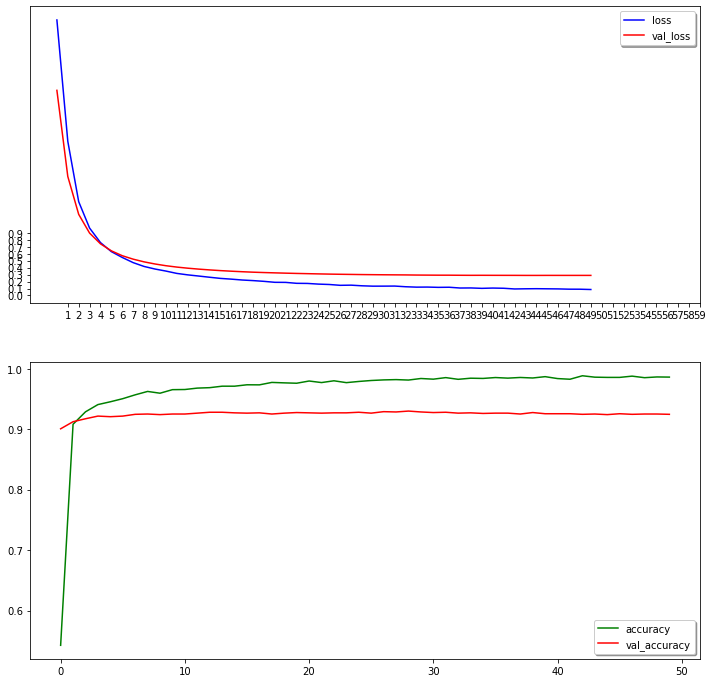

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(h.history['loss'],color = 'b',label = 'loss')
ax1.plot(h.history['val_loss'],color = 'r',label = 'val_loss')
ax1.set_xticks(np.arange(1, 60, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(['loss','val_loss'],shadow = True)


ax2.plot(h.history['accuracy'],color = 'green',label = 'accuracy')
ax2.plot(h.history['val_accuracy'],color = 'red',label = 'val_accuracy')
ax2.legend(['accuracy','val_accuracy'],shadow = True)
plt.show()

# ABOVE ARE THE RESULTS OF MODEL